In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [2]:
# to install this you need to use "pip install stellargraph"

In [3]:
print(nx.__version__)

2.3


In [4]:
!pip3 freeze | grep matplot

matplotlib==3.1.2


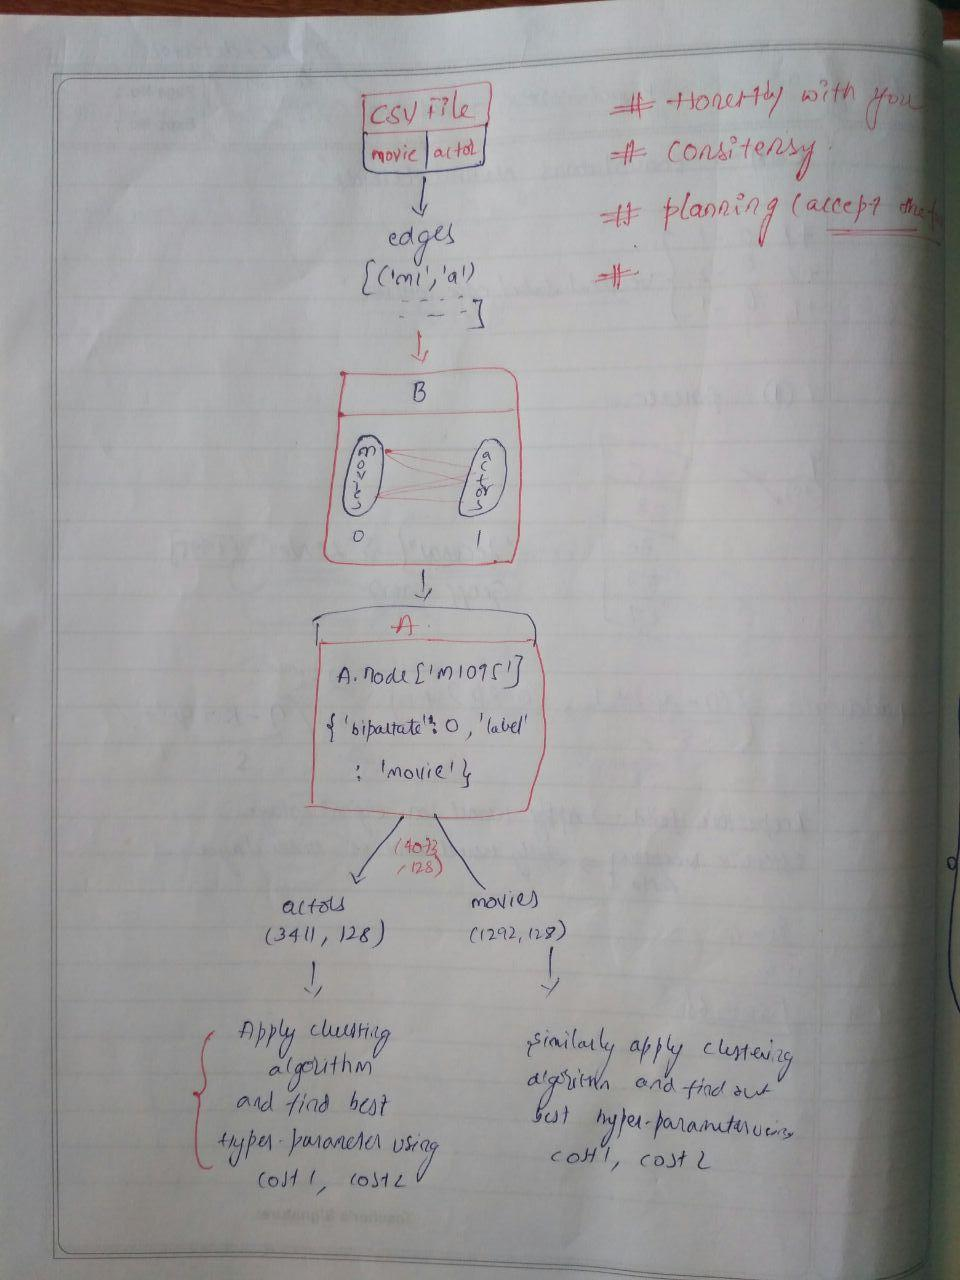

In [5]:
''' Loading the movie actor network file '''
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])
data

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3
...,...,...
9645,m1380,a816
9646,m1380,a962
9647,m1381,a1225
9648,m1381,a1436


In [6]:
''' creating edges from the pandas dataframe '''
edges = [tuple(x) for x in data.values.tolist()]
edges

[('m1', 'a1'),
 ('m2', 'a1'),
 ('m2', 'a2'),
 ('m3', 'a1'),
 ('m3', 'a3'),
 ('m3', 'a4'),
 ('m3', 'a5'),
 ('m3', 'a6'),
 ('m3', 'a7'),
 ('m4', 'a1'),
 ('m4', 'a10'),
 ('m4', 'a8'),
 ('m4', 'a9'),
 ('m5', 'a1'),
 ('m5', 'a11'),
 ('m5', 'a12'),
 ('m5', 'a13'),
 ('m5', 'a14'),
 ('m5', 'a15'),
 ('m5', 'a16'),
 ('m5', 'a17'),
 ('m5', 'a18'),
 ('m5', 'a19'),
 ('m7', 'a21'),
 ('m7', 'a22'),
 ('m8', 'a22'),
 ('m9', 'a22'),
 ('m9', 'a23'),
 ('m10', 'a22'),
 ('m10', 'a24'),
 ('m10', 'a25'),
 ('m11', 'a22'),
 ('m11', 'a26'),
 ('m11', 'a27'),
 ('m11', 'a28'),
 ('m11', 'a29'),
 ('m24', 'a47'),
 ('m25', 'a47'),
 ('m25', 'a48'),
 ('m25', 'a49'),
 ('m25', 'a50'),
 ('m25', 'a51'),
 ('m25', 'a52'),
 ('m25', 'a53'),
 ('m25', 'a54'),
 ('m25', 'a55'),
 ('m25', 'a56'),
 ('m25', 'a57'),
 ('m25', 'a58'),
 ('m25', 'a59'),
 ('m25', 'a60'),
 ('m25', 'a61'),
 ('m25', 'a62'),
 ('m25', 'a63'),
 ('m25', 'a64'),
 ('m25', 'a65'),
 ('m25', 'a66'),
 ('m25', 'a67'),
 ('m25', 'a68'),
 ('m25', 'a69'),
 ('m25', 'a70'),
 ('m

In [7]:
''' Creating a graph network '''
B = nx.Graph()
#adding nodes to graph
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
#adding edges to graph
B.add_edges_from(edges, label='acted')
B.edges

EdgeView([('m1', 'a1'), ('m2', 'a1'), ('m2', 'a2'), ('m3', 'a1'), ('m3', 'a3'), ('m3', 'a4'), ('m3', 'a5'), ('m3', 'a6'), ('m3', 'a7'), ('m4', 'a1'), ('m4', 'a10'), ('m4', 'a8'), ('m4', 'a9'), ('m5', 'a1'), ('m5', 'a11'), ('m5', 'a12'), ('m5', 'a13'), ('m5', 'a14'), ('m5', 'a15'), ('m5', 'a16'), ('m5', 'a17'), ('m5', 'a18'), ('m5', 'a19'), ('m7', 'a21'), ('m7', 'a22'), ('m8', 'a22'), ('m9', 'a22'), ('m9', 'a23'), ('m10', 'a22'), ('m10', 'a24'), ('m10', 'a25'), ('m11', 'a22'), ('m11', 'a26'), ('m11', 'a27'), ('m11', 'a28'), ('m11', 'a29'), ('m24', 'a47'), ('m25', 'a47'), ('m25', 'a48'), ('m25', 'a49'), ('m25', 'a50'), ('m25', 'a51'), ('m25', 'a52'), ('m25', 'a53'), ('m25', 'a54'), ('m25', 'a55'), ('m25', 'a56'), ('m25', 'a57'), ('m25', 'a58'), ('m25', 'a59'), ('m25', 'a60'), ('m25', 'a61'), ('m25', 'a62'), ('m25', 'a63'), ('m25', 'a64'), ('m25', 'a65'), ('m25', 'a66'), ('m25', 'a67'), ('m25', 'a68'), ('m25', 'a69'), ('m25', 'a70'), ('m26', 'a47'), ('m26', 'a71'), ('m26', 'a72'), ('m26',

In [8]:
''' Getting the coonected sub graph components'''
A = list(nx.connected_component_subgraphs(B))[0]

In [9]:
# File weights are already saved

In [10]:
from gensim.models import Word2Vec
clustering_model = Word2Vec.load("clustering_word2vec.model")

In [11]:
#shape afer using Word2Vec model of 128 dim
clustering_model.wv.vectors.shape

(4703, 128)

In [12]:
# Word2Vec vectors 
get_clustering_model_vectors = clustering_model.wv.vectors
get_clustering_model_vectors

array([[ 0.49040353,  0.35513365, -0.09746691, ..., -0.5842914 ,
         0.7842303 , -1.5075505 ],
       [ 0.0539096 ,  0.2200051 , -0.84187573, ..., -1.1471574 ,
        -0.08991306, -0.43154967],
       [-1.3629588 ,  0.56075376,  0.17978881, ..., -0.6958599 ,
        -0.03780475,  0.28467494],
       ...,
       [-0.06870703, -0.01312153, -0.14908783, ..., -0.08773582,
        -0.0306545 , -0.14263871],
       [-0.06142563, -0.06422818, -0.16347292, ..., -0.12444828,
        -0.08794963, -0.04515016],
       [-0.06936088, -0.01347885, -0.11517613, ..., -0.09079985,
        -0.11277723,  0.00460553]], dtype=float32)

In [13]:
# stroing indexs from Word2Vec
get_clustering_model_ids = clustering_model.wv.index2word
get_clustering_model_ids

['a973',
 'a967',
 'a1731',
 'a964',
 'a970',
 'a969',
 'a1057',
 'a1028',
 'a965',
 'm1094',
 'm1111',
 'a1003',
 'm1100',
 'a959',
 'a966',
 'a988',
 'a1037',
 'm67',
 'a49',
 'a962',
 'a93',
 'm1095',
 'a1076',
 'a971',
 'a963',
 'a1030',
 'a960',
 'a1027',
 'a1016',
 'a977',
 'a204',
 'a768',
 'a472',
 'a631',
 'm1001',
 'a2715',
 'a1020',
 'a968',
 'a407',
 'a1004',
 'a1035',
 'a1026',
 'a1507',
 'a138',
 'a306',
 'm1114',
 'm376',
 'm1112',
 'a1031',
 'a975',
 'a972',
 'a1036',
 'm1113',
 'm987',
 'm1261',
 'm1096',
 'a1435',
 'm75',
 'm1232',
 'm1097',
 'm148',
 'm126',
 'm26',
 'a1008',
 'm1022',
 'a987',
 'a782',
 'm1000',
 'a205',
 'm1106',
 'm453',
 'a1021',
 'm1220',
 'a921',
 'a1038',
 'm1357',
 'm816',
 'm25',
 'm157',
 'm32',
 'a1467',
 'm121',
 'a976',
 'm796',
 'a1011',
 'm990',
 'm1108',
 'm988',
 'm154',
 'm147',
 'm122',
 'm964',
 'm115',
 'a1436',
 'm914',
 'm1098',
 'a1060',
 'a974',
 'm983',
 'a1005',
 'm1090',
 'm159',
 'a1015',
 'a228',
 'm1045',
 'a1750',
 'a3

In [14]:
#getting movie actor ids 
get_actor_model_target_ids = [ele_indx   for ele_indx,each_index in enumerate(get_clustering_model_ids) if A.node[each_index]['label']=='actor' ]
get_actor_model_target_ids

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 11,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 48,
 49,
 50,
 51,
 56,
 63,
 65,
 66,
 68,
 71,
 73,
 74,
 80,
 82,
 84,
 93,
 96,
 97,
 99,
 102,
 103,
 105,
 106,
 109,
 118,
 130,
 131,
 137,
 141,
 145,
 149,
 153,
 156,
 162,
 176,
 189,
 194,
 198,
 199,
 200,
 237,
 251,
 265,
 273,
 279,
 280,
 286,
 291,
 307,
 322,
 328,
 342,
 347,
 355,
 367,
 383,
 396,
 397,
 409,
 437,
 439,
 442,
 455,
 458,
 466,
 471,
 472,
 473,
 474,
 482,
 486,
 488,
 497,
 501,
 502,
 508,
 523,
 533,
 535,
 541,
 545,
 547,
 559,
 566,
 567,
 608,
 611,
 613,
 622,
 633,
 634,
 637,
 639,
 649,
 654,
 665,
 679,
 681,
 685,
 696,
 702,
 712,
 713,
 715,
 721,
 723,
 727,
 729,
 731,
 734,
 735,
 737,
 767,
 777,
 783,
 790,
 791,
 794,
 799,
 800,
 809,
 821,
 828,
 831,
 835,
 839,
 848,
 851,
 852,
 853,
 862,
 863,
 865,
 881,
 883,
 884,
 895,
 898,
 900,

In [15]:
#getting the movie actor vectos - data points 
get_actor_model_records = get_clustering_model_vectors[get_actor_model_target_ids]
get_actor_model_records.shape

(3411, 128)

In [16]:
# cross checking whether the data points are actors or not 
for i in get_actor_model_target_ids:
    print(get_clustering_model_ids[i])
    

a973
a967
a1731
a964
a970
a969
a1057
a1028
a965
a1003
a959
a966
a988
a1037
a49
a962
a93
a1076
a971
a963
a1030
a960
a1027
a1016
a977
a204
a768
a472
a631
a2715
a1020
a968
a407
a1004
a1035
a1026
a1507
a138
a306
a1031
a975
a972
a1036
a1435
a1008
a987
a782
a205
a1021
a921
a1038
a1467
a976
a1011
a1436
a1060
a974
a1005
a1015
a228
a1750
a363
a1505
a893
a1018
a400
a1023
a1032
a1025
a1029
a3378
a1024
a1039
a3369
a595
a1019
a801
a1043
a1381
a773
a1366
a989
a812
a217
a1017
a1079
a1672
a1034
a1716
a152
a222
a1483
a1063
a1181
a1047
a370
a393
a1442
a440
a821
a11
a101
a789
a1045
a598
a775
a1041
a95
a1782
a1022
a50
a200
a90
a820
a1048
a466
a816
a1232
a834
a1083
a52
a2349
a88
a203
a450
a2305
a1042
a880
a1524
a790
a503
a1040
a1558
a2374
a1513
a2222
a1758
a2139
a431
a538
a924
a1363
a1176
a1635
a2785
a1454
a807
a2361
a3561
a1
a434
a51
a316
a416
a239
a794
a1704
a1222
a1329
a818
a771
a115
a984
a854
a1384
a1416
a865
a285
a1373
a462
a425
a2755
a378
a2181
a1177
a1800
a803
a2367
a1291
a1077
a1468
a2393
a1170
a22

a3374
a3628
a1096
a301
a249
a3638
a2895
a2824
a562
a558
a561
a114
a2422
a2871
a485
a544
a2353
a2103
a1726
a2315
a646
a647
a697
a652
a3261
a1459
a1675
a1549
a3644
a2682
a3317
a2326
a2324
a62
a3453
a2497
a3217
a2637
a946
a2113
a1151
a2227
a1636
a1252
a1627
a286
a1348
a2037
a1735
a3543
a2520
a2069
a2894
a2554
a2676
a489
a3662
a2827
a3067
a455
a2341
a268
a3519
a2623
a270
a2265
a2972
a2935
a3071
a2021
a2022
a2698
a1053
a21
a2008
a2780
a2307
a1757
a2759
a1302
a2175
a3588
a2188
a2808
a2781
a3636
a3657
a1529
a3600
a1502
a394
a1075
a556
a479
a2427
a1769
a2593
a1616
a2922
a2958
a2006
a2174
a642
a744
a696
a2879
a2397
a3030
a1943
a2664
a864
a513
a824
a1577
a2325
a3452
a2632
a1897
a861
a907
a1819
a1818
a2524
a2105
a2459
a3210
a2329
a3352
a2813
a2356
a322
a1240
a3498
a1645
a1457
a1889
a1886
a1603
a1559
a2832
a1157
a2068
a1372
a1277
a1792
a2364
a272
a2690
a457
a3540
a3225
a1620
a1725
a3597
a2150
a3400
a3079
a3419
a8
a1915
a2779
a2774
a3264
a1342
a3634
a1129
a2453
a2450
a271
a1103
a2600
a2404
a1503
a1

a1707
a2311
a1263
a2110
a1844
a2489
a1640
a1930
a3589
a3650
a2505
a2156
a2047
a2482
a1842
a1352
a2668
a1521
a3618
a1762
a2300
a1987
a1445
a3397
a3421
a2272
a2484
a876
a1969
a3343
a240
a2377
a3578
a1633
a2029
a2182
a1683
a837
a840
a1982
a3289
a1555
a2211
a2163
a2053
a1859
a3558
a2167
a2154
a2158
a3614
a3344
a1481
a3674
a1928
a2145
a2014
a1608
a2570
a3412
a2362
a1848
a2488
a1944
a1108
a2387
a2023
a1584
a3290
a2015
a1853
a2161
a2703
a2153
a1988
a1523
a2111
a2294
a1534
a2565
a3571
a2618
a846
a2136
a839
a2097
a2483
a795
a3566
a1142
a1703
a3537
a1007
a2250
a2155
a2727
a1241
a3494
a3363
a2099
a2560
a1105
a1989
a2571
a2376


In [17]:
''' function to return the right side nodes in connected components - written for custom using '''
def return_right_side_nodes_count(total_nodes,left_side_nodes):
    v_nodes_count = 0
    for item in total_nodes:
        if item not in left_side_nodes:
            v_nodes_count += 1
    return v_nodes_count

1. Read Graph from the given movie_actor_network.csv note that the graph is bipartite graph
2. using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph
3. Apply Clustering Algorithm to group similar actors

	a. For this task consider only the actor nodes <br>
	b. Apply any clustering algorithm of your choice <br>
	c. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
	
    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>
    
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
    
	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node<br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color


4. Apply Clustering Algorithm to group similar movies

	a. for this task consider only the movie nodes
  
	b. apply any clustering algorithm of your choice
  
	c. choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	
	Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ where N= number of clusters 

	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color
	


<img src='https://i.imgur.com/4SPYPFa.jpg'>

### these links and function might be usefull while solving this assignment
1. what is bipartite graph: https://en.wikipedia.org/wiki/Bipartite_graph
2. Ego graph: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html
3. Combining two are more graphs: https://stackoverflow.com/a/32652764/4084039
    ex: if you want to merge three graphs which are mentiond in the above image, you can write like this
    <pre>
    U=nx.Graph()
    for i in number of clusters:
        if U is empty:
            U.add_edges_from(ith Cluster's graph.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)) 
        else:
            U.add_edges_from(ith Cluster's graph.edges(data=True)+U.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)+U.nodes(data=True))
    </pre>
4. connected components:  https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
5. Degree of a node: https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
6. Neighbors of node: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html

### ACTORS CLUSTERING

In [18]:
from sklearn.cluster import KMeans
import numpy as np

#calculation for 
overall_cost_1 = []
overall_cost_2 = []
overall_cost   = []
#getting required indexs and datapoints for actor 
get_actor_model_target_ids = [ele_indx   for ele_indx,each_index in enumerate(get_clustering_model_ids) if A.node[each_index]['label']=='actor' ]
get_actor_model_target_ids
get_actor_model_records = get_clustering_model_vectors[get_actor_model_target_ids]
get_actor_model_records.shape
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
#running on different cluster for actor data points
for i in clusters:
    #kmeans model applying 
    X = get_actor_model_records
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    
    #mapping the nodes as keys
    list_of_all_clusters = []
    unique_labels = np.unique(kmeans.labels_)
    dict_of_actor_nodes = {get_clustering_model_ids[indx]:item for indx,item in zip(get_actor_model_target_ids,kmeans.labels_) }
    #mapping funciton to actor ndoes
    for each_unique_cluster in unique_labels:
        current_cluster = []
        for node_id,cluster_number in dict_of_actor_nodes.items():
            if cluster_number == each_unique_cluster:
                current_cluster.append(node_id)
        print("{} cluster length is {}".format(str(each_unique_cluster),str(len(current_cluster))))
        list_of_all_clusters.append(current_cluster)
        
    # finally calculating cost-1 & cost-2 
    cost1 = 0
    cost2 = 0
    total_clusters = len(list_of_all_clusters)
    for each_cluster in list_of_all_clusters:
        G = nx.Graph()
        cost_1_sub_graph_ratio = 0
        cost_2_sub_graph_ratio = 0
        for each_node in each_cluster:
            #print(each_node)
            ego_subgrapgh_object = nx.ego_graph(B,each_node)
            G.add_nodes_from(ego_subgrapgh_object.nodes())
            G.add_edges_from(ego_subgrapgh_object.edges())
        ''' for calculating cost one '''
        #largest connected components 
        largest_connect_components =  max(nx.connected_component_subgraphs(G), key=len)
        largest_connected_nodes    =  len(largest_connect_components.nodes())
        # total nodes in sub-graph
        total_nodes_in_subgraph    =  nx.number_of_nodes(G)
        cost_1_sub_graph_ratio     +=  largest_connected_nodes/total_nodes_in_subgraph

        ''' for calculating cost two '''
        total_edges_in_subgraph    =  nx.number_of_edges(G)
        total_right_side_nodes     =  return_right_side_nodes_count(G.nodes(),each_cluster)
        cost_2_sub_graph_ratio     +=  total_edges_in_subgraph/total_right_side_nodes
        print(cost_1_sub_graph_ratio, cost_2_sub_graph_ratio)
    cost1 = cost_1_sub_graph_ratio/total_clusters
    cost2 = cost_2_sub_graph_ratio/total_clusters
    overall_cost_1.append(cost1)
    overall_cost_2.append(cost2)
    overall_cost.append(cost1*cost2)
    print("Final cost1 and cost 2 is {}, {} - overall cost is {}".format(cost1, cost2, cost1*cost2 ))





0 cluster length is 68
1 cluster length is 3000
2 cluster length is 343
1.0 4.1187569367369585
0.8183716075156576 5.1045673076923075
0.9191583610188261 3.0214285714285714
Final cost1 and cost 2 is 0.3063861203396087, 1.0071428571428571 - overall cost is 0.3085745926277488
0 cluster length is 38
1 cluster length is 35
2 cluster length is 360
3 cluster length is 35
4 cluster length is 2943
0.7064846416382252 1.4823529411764707
1.0 2.6
1.0 3.4210526315789473
1.0 3.483760683760684
0.7816617370260823 5.134020618556701
Final cost1 and cost 2 is 0.15633234740521645, 1.0268041237113403 - overall cost is 0.16052269898515012
0 cluster length is 239
1 cluster length is 45
2 cluster length is 35
3 cluster length is 153
4 cluster length is 25
5 cluster length is 2346
6 cluster length is 50
7 cluster length is 62
8 cluster length is 317
9 cluster length is 139
0.9824120603015075 3.050314465408805
1.0 3.0239680426098534
0.6532258064516129 1.5539906103286385
1.0 2.3715415019762847
1.0 3.17136659436008

0.08904109589041095 2.7325581395348837
1.0 1.0
0.8620689655172413 1.85
1.0 1.0
0.6242424242424243 1.9390243902439024
1.0 1.0
1.0 2.727272727272727
1.0 1.6045627376425855
1.0 1.0
1.0 1.375
1.0 1.5625
1.0 1.0
1.0 1.0
0.8 3.75
0.9253731343283582 1.6734693877551021
0.5825688073394495 5.435897435897436
1.0 1.1595744680851063
1.0 1.1481481481481481
0.9770114942528736 1.8431372549019607
0.31666666666666665 1.5
0.2773972602739726 3.9206349206349205
1.0 1.0
1.0 1.3076923076923077
1.0 1.0
1.0 1.0
1.0 1.0
0.23728813559322035 1.7032967032967032
0.9217391304347826 1.5945945945945945
0.8913043478260869 1.2777777777777777
0.07096774193548387 3.8088235294117645
0.09251101321585903 2.086021505376344
1.0 1.1794871794871795
1.0 1.2972972972972974
1.0 1.0
1.0 1.0
1.0 1.0
0.625 1.5
1.0 1.4464285714285714
1.0 1.0
1.0 1.0
1.0 1.709090909090909
1.0 1.0
0.02666666666666667 2.535211267605634
0.16774193548387098 2.0
1.0 1.3333333333333333
1.0 1.8076923076923077
0.1853932584269663 2.4915254237288136
1.0 1.0
1.0 1

0.5769230769230769 1.2972972972972974
0.5909090909090909 1.7857142857142858
1.0 1.0
1.0 1.0
0.4444444444444444 1.9583333333333333
0.29411764705882354 2.1666666666666665
0.6923076923076923 1.0434782608695652
0.21951219512195122 3.0
1.0 1.9666666666666666
1.0 2.0
1.0 3.5833333333333335
0.06875 3.3157894736842106
0.5357142857142857 2.8
0.15254237288135594 2.0697674418604652
0.0703125 2.1914893617021276
1.0 1.96
0.9545454545454546 2.0
1.0 1.0
1.0 1.0
1.0 1.0
0.88 4.6
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.7037037037037037 1.7586206896551724
1.0 1.0
0.5806451612903226 4.666666666666667
1.0 1.3703703703703705
1.0 1.6666666666666667
1.0 1.0434782608695652
0.4857142857142857 2.52
1.0 1.3513513513513513
1.0 1.0
1.0 1.5714285714285714
1.0 1.0
1.0 1.0
0.7307692307692307 1.5
1.0 1.0
1.0 1.0
0.2608695652173913 1.0263157894736843
0.9259259259259259 1.6388888888888888
1.0 1.8888888888888888
1.0 1.0
0.425 2.5
0.5263157894736842 2.2857142857142856
1.0 1.0
0.5616438356164384 6.2727272727272725
1.0 1.0
1.0 1.

439 cluster length is 1
440 cluster length is 9
441 cluster length is 1
442 cluster length is 1
443 cluster length is 11
444 cluster length is 1
445 cluster length is 1
446 cluster length is 8
447 cluster length is 1
448 cluster length is 10
449 cluster length is 2
450 cluster length is 1
451 cluster length is 8
452 cluster length is 39
453 cluster length is 4
454 cluster length is 1
455 cluster length is 1
456 cluster length is 11
457 cluster length is 1
458 cluster length is 29
459 cluster length is 1
460 cluster length is 1
461 cluster length is 7
462 cluster length is 2
463 cluster length is 8
464 cluster length is 1
465 cluster length is 2
466 cluster length is 1
467 cluster length is 1
468 cluster length is 1
469 cluster length is 1
470 cluster length is 7
471 cluster length is 15
472 cluster length is 7
473 cluster length is 7
474 cluster length is 3
475 cluster length is 6
476 cluster length is 1
477 cluster length is 8
478 cluster length is 2
479 cluster length is 1
480 cluste

Text(0, 0.5, 'cost')

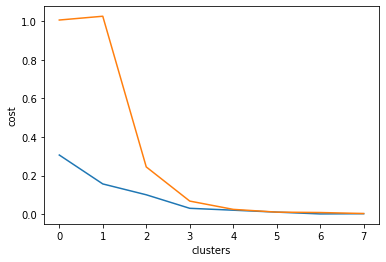

In [19]:
plt.plot(overall_cost_1)
plt.plot(overall_cost_2)
plt.xlabel('clusters')
plt.ylabel('cost')

Text(0, 0.5, 'cost')

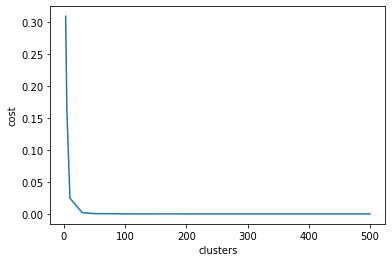

In [20]:
plt.plot(clusters,overall_cost)
plt.xlabel('clusters')
plt.ylabel('cost')

In [21]:
print("actor nodes best cost is {} for {} clusters ".format(overall_cost[0],clusters[0]))

actor nodes best cost is 0.3085745926277488 for 3 clusters 


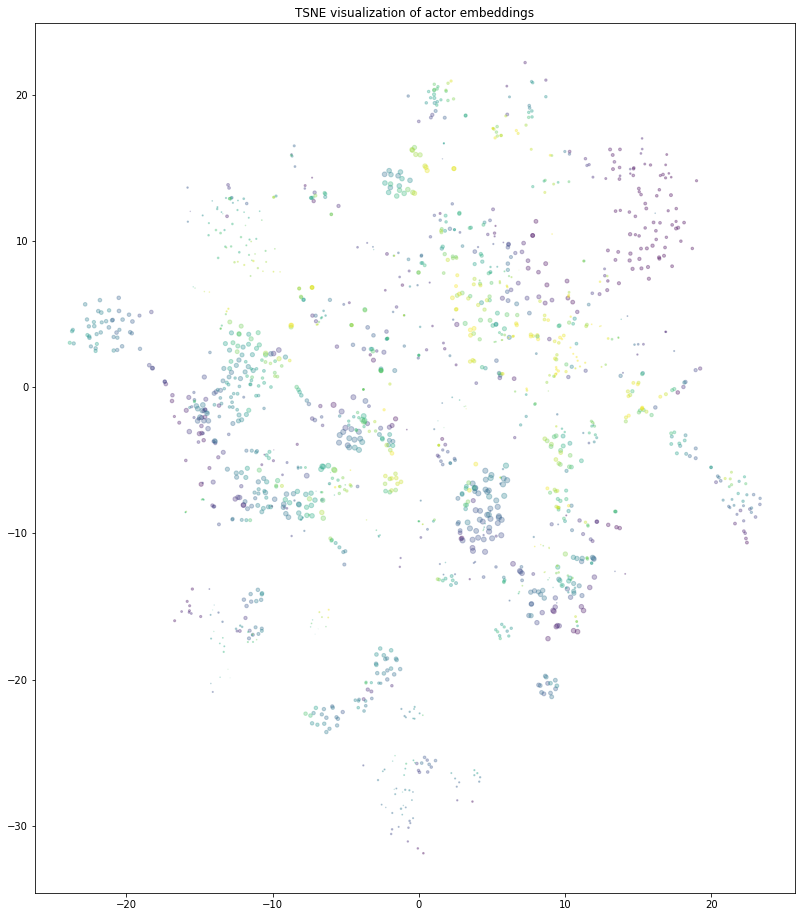

In [22]:
#this for plotting the tsne on actor nodes 
from sklearn.manifold import TSNE
import numpy as np
# this code is refrenced from aaic refrence notebook
transform = TSNE #PCA
trans = transform(n_components=3)
node_embeddings_2d = trans.fit_transform(get_actor_model_records)
label_map = { l: i for i, l in enumerate(np.unique(get_actor_model_target_ids))}
node_colours = [ label_map[target] for target in get_actor_model_target_ids]
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1],
            node_embeddings_2d[:,2],
            c=node_colours, alpha=0.3)
plt.title('{} visualization of actor embeddings'.format(transform.__name__))

plt.show()

## Movies clustering

In [23]:
from sklearn.cluster import KMeans
import numpy as np
overall_cost_1 = []
overall_cost_2 = []
overall_cost   = []
get_movie_model_target_ids = [ele_indx   for ele_indx,each_index in enumerate(get_clustering_model_ids) if A.node[each_index]['label']=='movie' ]
get_movie_model_records   = get_clustering_model_vectors[get_movie_model_target_ids]
#get_movie_model_records.shape
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
for i in clusters:
    #kmeans model applying 
    X = get_movie_model_records
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    
    #mapping the nodes as keys
    list_of_all_clusters = []
    unique_labels = np.unique(kmeans.labels_)
    dict_of_movie_nodes = {get_clustering_model_ids[indx]:item for indx,item in zip(get_movie_model_target_ids,kmeans.labels_) }
    for each_unique_cluster in unique_labels:
        current_cluster = []
        #print(each_unique_cluster)
        for node_id,cluster_number in dict_of_movie_nodes.items():
            if cluster_number == each_unique_cluster:
                current_cluster.append(node_id)
        print("{} cluster length is {}".format(str(each_unique_cluster),str(len(current_cluster))))
        list_of_all_clusters.append(current_cluster)
        
    # finally calculating cost-1 & cost-2 
    cost1 = 0
    cost2 = 0
    total_clusters = len(list_of_all_clusters)
    for each_cluster in list_of_all_clusters:
        G = nx.Graph()
        cost_1_sub_graph_ratio = 0
        cost_2_sub_graph_ratio = 0
        for each_node in each_cluster:
            #print(each_node)
            ego_subgrapgh_object = nx.ego_graph(B,each_node)
            G.add_nodes_from(ego_subgrapgh_object.nodes())
            G.add_edges_from(ego_subgrapgh_object.edges())
        ''' for calculating cost one '''
        #largest connected components 
        largest_connect_components =  max(nx.connected_component_subgraphs(G), key=len)
        largest_connected_nodes    =  len(largest_connect_components.nodes())
        # total nodes in sub-graph
        total_nodes_in_subgraph    =  nx.number_of_nodes(G)
        cost_1_sub_graph_ratio     +=  largest_connected_nodes/total_nodes_in_subgraph

        ''' for calculating cost two '''
        total_edges_in_subgraph    =  nx.number_of_edges(G)
        total_right_side_nodes     =  return_right_side_nodes_count(G.nodes(),each_cluster)
        cost_2_sub_graph_ratio     +=  total_edges_in_subgraph/total_right_side_nodes
        print(cost_1_sub_graph_ratio, cost_2_sub_graph_ratio)
    cost1 = cost_1_sub_graph_ratio/total_clusters
    cost2 = cost_2_sub_graph_ratio/total_clusters
    overall_cost_1.append(cost1)
    overall_cost_2.append(cost2)
    overall_cost.append(cost1*cost2)
    print("Final cost1 and cost 2 is {}, {} - overall {}".format(cost1, cost2,overall_cost))
    

0 cluster length is 269
1 cluster length is 230
2 cluster length is 793
1.0 1.9315068493150684
0.9746168582375478 1.3439181916038752
0.9724137931034482 5.171066525871172
Final cost1 and cost 2 is 0.32413793103448274, 1.7236888419570573 - overall [0.5587129349791841]
0 cluster length is 228
1 cluster length is 327
2 cluster length is 141
3 cluster length is 69
4 cluster length is 527
1.0 1.8644906033630069
1.0 5.745011086474501
0.9416846652267818 1.2459935897435896
1.0 1.346938775510204
0.9468838526912181 3.119774011299435
Final cost1 and cost 2 is 0.18937677053824362, 0.6239548022598871 - overall [0.5587129349791841, 0.1181625454138058]
0 cluster length is 94
1 cluster length is 269
2 cluster length is 25
3 cluster length is 288
4 cluster length is 33
5 cluster length is 92
6 cluster length is 57
7 cluster length is 139
8 cluster length is 235
9 cluster length is 60
1.0 1.4919614147909968
1.0 11.602272727272727
1.0 1.2235576923076923
0.8600543478260869 1.9397321428571428
1.0 1.20398009

1.0 1.8732394366197183
1.0 1.2
0.8732394366197183 1.2758620689655173
1.0 1.5116279069767442
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.1929824561403508
1.0 1.360655737704918
1.0 1.0975609756097562
1.0 1.25
1.0 1.5061728395061729
1.0 1.1935483870967742
1.0 1.0
1.0 1.8571428571428572
1.0 1.5862068965517242
1.0 1.0588235294117647
1.0 4.51948051948052
0.8602150537634409 1.205128205128205
1.0 1.3493975903614457
1.0 12.413333333333334
1.0 1.03125
1.0 1.0
1.0 1.4782608695652173
1.0 1.1944444444444444
1.0 1.1973684210526316
1.0 1.302325581395349
1.0 1.2727272727272727
1.0 1.0
1.0 1.271604938271605
1.0 1.206896551724138
1.0 1.0
1.0 1.0
1.0 1.4383561643835616
1.0 1.0
1.0 1.2253521126760563
1.0 1.2647058823529411
1.0 1.098360655737705
1.0 1.0
1.0 1.1159420289855073
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.3181818181818181
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0810810810810811
1.0 1.125
1.0 1.1470588235294117
1.0 1.2121212121212122
1.0 1.1714285714285715
1.0 1.4
1.0 1.3962264150943395
1.0 1.0
1.0 1.33333333333333

1.0 1.1333333333333333
1.0 1.0
1.0 1.0
1.0 7.538461538461538
1.0 1.1428571428571428
1.0 1.0
1.0 1.1481481481481481
1.0 1.3333333333333333
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.4
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.037037037037037
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.123076923076923
0.6808510638297872 1.0952380952380953
1.0 1.5769230769230769
1.0 1.0
1.0 1.375
1.0 1.0
1.0 1.0769230769230769
1.0 3.310344827586207
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.1666666666666667
1.0 1.3148148148148149
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0526315789473684
1.0 1.625
1.0 5.0
1.0 1.0
1.0 1.0
1.0 1.1428571428571428
1.0 1.0
1.0 1.3428571428571427
1.0 1.0
1.0 1.0
1.0 1.1363636363636365
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
Final cost1 and cost 2 is 0.005, 0.005 - overall [0.5587129349791841, 0.1181625454138058, 0.013290441176470588, 0.0013553113553113553, 0.0006515463917525772, 0.0001, 2.5e-05]
0 cluster length is 1
1 cluster length is 4
2 cluster length is 9
3

449 cluster length is 5
450 cluster length is 1
451 cluster length is 1
452 cluster length is 1
453 cluster length is 1
454 cluster length is 2
455 cluster length is 1
456 cluster length is 8
457 cluster length is 1
458 cluster length is 1
459 cluster length is 1
460 cluster length is 5
461 cluster length is 1
462 cluster length is 1
463 cluster length is 11
464 cluster length is 3
465 cluster length is 1
466 cluster length is 3
467 cluster length is 1
468 cluster length is 1
469 cluster length is 1
470 cluster length is 2
471 cluster length is 10
472 cluster length is 1
473 cluster length is 1
474 cluster length is 1
475 cluster length is 12
476 cluster length is 1
477 cluster length is 1
478 cluster length is 1
479 cluster length is 1
480 cluster length is 2
481 cluster length is 1
482 cluster length is 3
483 cluster length is 1
484 cluster length is 1
485 cluster length is 1
486 cluster length is 9
487 cluster length is 1
488 cluster length is 3
489 cluster length is 1
490 cluster l

Text(0, 0.5, 'cost')

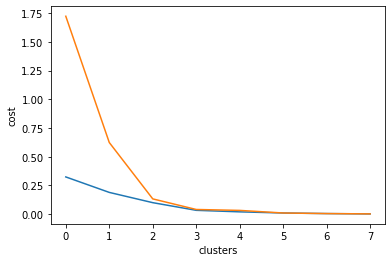

In [24]:
plt.plot(overall_cost_1)
plt.plot(overall_cost_2)
plt.xlabel('clusters')
plt.ylabel('cost')

Text(0, 0.5, 'cost')

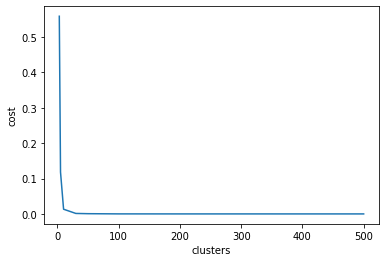

In [25]:
plt.plot(clusters,overall_cost)
plt.xlabel('clusters')
plt.ylabel('cost')

In [26]:
print("movies nodes best cost is {} for {} clusters ".format(overall_cost[0],clusters[0]))

movies nodes best cost is 0.5587129349791841 for 3 clusters 


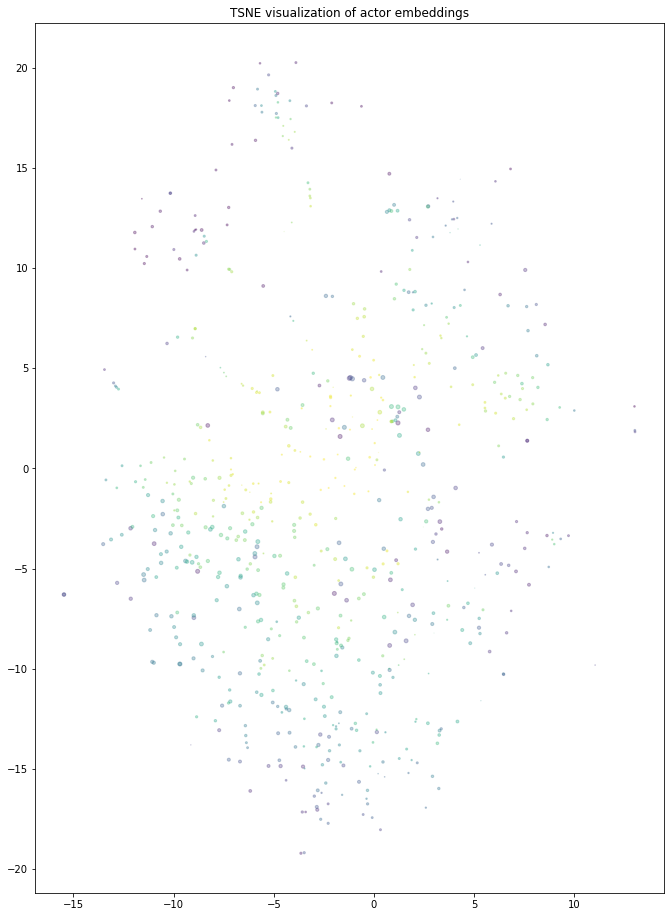

In [27]:
#this for plotting the tsne on actor nodes 
from sklearn.manifold import TSNE
import numpy as np
# this code is refrenced from aaic refrence notebook
transform = TSNE #PCA
trans = transform(n_components=3)
node_embeddings_2d = trans.fit_transform(get_movie_model_records)
label_map = { l: i for i, l in enumerate(np.unique(get_movie_model_target_ids))}
node_colours = [ label_map[target] for target in get_movie_model_target_ids]
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1],
            node_embeddings_2d[:,2],
            c=node_colours, alpha=0.3)
plt.title('{} visualization of actor embeddings'.format(transform.__name__))

plt.show()